# Task 1: Data Loading and Cleaning

In this task, we load the Titanic dataset from a URL, handle missing values by filling in the median for 'Age' and the mode for 'Embarked', remove duplicate rows, and save the cleaned dataset to a CSV file.


In [7]:
import pandas as pd

# Load Titanic dataset from URL
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

# Save cleaned data to file
df.to_csv("cleaned_data.csv", index=False)

print("Data cleaned and saved as cleaned_data.csv")


Data cleaned and saved as cleaned_data.csv


# Task 2: Model Training and Evaluation

In this step, we load the cleaned Titanic dataset and build a machine learning model to predict survival. We use a Random Forest Classifier and evaluate its performance using accuracy and a classification report.


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load cleaned data
df = pd.read_csv("cleaned_data.csv")

# Prepare features (X) and target (y)
y = df['Survived']
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Handle missing values in features
X = X.fillna(X.median())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.68      0.61      0.64        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.71       179
weighted avg       0.72      0.72      0.72       179



# Task 3: Exploratory Data Analysis (EDA)

In this task, we explore the cleaned Titanic dataset to gain insights into the data:

1. Display summary statistics for numerical features.
2. Plot a histogram of the 'Age' column to observe the distribution.
3. Create a heatmap to visualize correlations between numeric features.
4. Show a bar chart of survival counts.


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


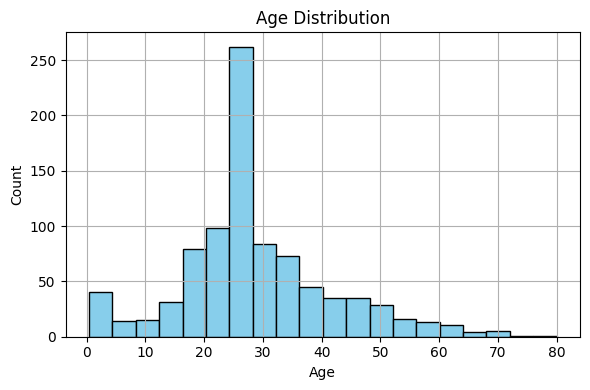

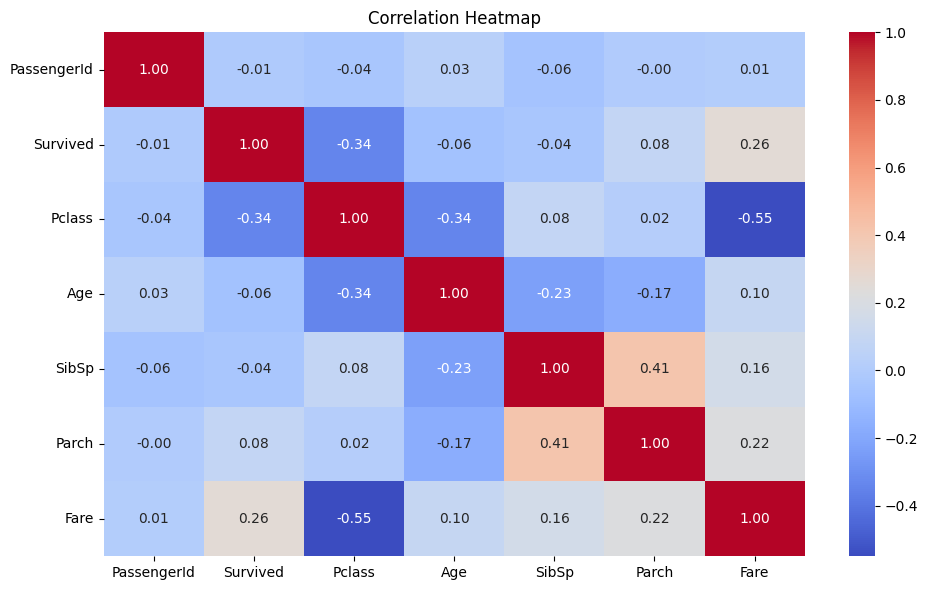

C:\Users\HP\AppData\Local\Temp\ipykernel_2652\2628723765.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Survived', palette='Set2')


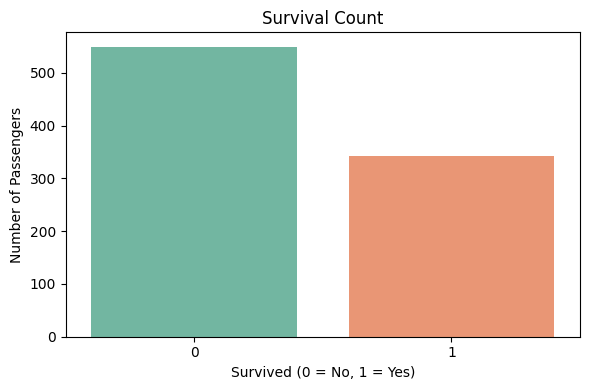

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("cleaned_data.csv")

# 1. Summary Statistics
print("Summary Statistics:")
print(df.describe())

# 2. Histogram: Age distribution
plt.figure(figsize=(6, 4))
df['Age'].dropna().hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Heatmap: Correlation between numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 4. Bar Chart: Survival count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Survived', palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.tight_layout()
plt.show()


# Task 4: User Interface (UI) with Gradio

In this task, we build a simple web-based UI using **Gradio** that allows users to input Titanic passenger details and receive a prediction on whether the passenger would survive. The UI takes in five numerical inputs and returns a prediction from the trained Random Forest model.


In [2]:
import pandas as pd
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the cleaned data
df = pd.read_csv("cleaned_data.csv")

# Use only numeric features and fill missing values
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features].fillna(df[features].median())
y = df['Survived']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Define prediction function
def predict_survival(pclass, age, sibsp, parch, fare):
    input_data = [[pclass, age, sibsp, parch, fare]]
    prediction = model.predict(input_data)[0]
    return "Survived ✅" if prediction == 1 else "Did not survive ❌"

# Gradio UI
interface = gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Number(label="Passenger Class (1, 2, or 3)"),
        gr.Number(label="Age"),
        gr.Number(label="Siblings/Spouses Aboard"),
        gr.Number(label="Parents/Children Aboard"),
        gr.Number(label="Fare")
    ],
    outputs="text",
    title="Titanic Survival Predictor",
    description="Enter passenger details to predict survival"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
